In [1]:
import sys
import pandas as pd
import numpy as np
sys.path.append("../")
import biobss
import matplotlib.pyplot as plt

In [2]:
import neurokit2 as nk
sample_data = pd.read_csv("..\sample_data\\GSRshimmer_allExp.csv")


In [3]:
sample_data.head()

,Experiment_Marker,Marker_TimeStamp,LSL_Timestamp,Timestamp_RAW(no_units),Timestamp_CAL(mSecs),System_Timestamp_CAL(mSecs),Internal_ADC_A13_RAW(no_units),Internal_ADC_A13_CAL(mVolts),GSR_RAW(no_units),GSR_CAL(kOhms),GSR_Conductance_CAL(uSiemens)
0,104.0,7.244475e+06,7.244475e+06,9310990,706160.15625,1.578042e+12,1924,1409.523810,51161,1697.889182,0.588967
1,NaN,NaN,7.244475e+06,9311118,706164.06250,1.578042e+12,1927,1411.721612,51157,1703.024575,0.587191
2,NaN,NaN,7.244475e+06,9311246,706167.96875,1.578042e+12,1930,1413.919414,51157,1703.024575,0.587191
3,NaN,NaN,7.244475e+06,9311374,706171.87500,1.578042e+12,1931,1414.652015,51152,1709.487666,0.584971
4,NaN,NaN,7.244475e+06,9311502,706175.78125,1.578042e+12,1932,1415.384615,51157,1703.024575,0.587191


In [4]:
gsr_data=sample_data["GSR_Conductance_CAL(uSiemens)"]
timestamp_data=sample_data["LSL_Timestamp"]

In [5]:
gsr_data

0         0.588967
1         0.587191
2         0.587191
3         0.584971
4         0.587191
            ...   
139787    0.574759
139788    0.577423
139789    0.572983
139790    0.578755
139791    0.577867
Name: GSR_Conductance_CAL(uSiemens), Length: 139792, dtype: float64

In [6]:
decompose = biobss.pipeline.Bio_Process(
    process_method=biobss.edatools.eda_decompose, modality="EDA", sigtype="EDA", method="highpass")

filtering=biobss.pipeline.Bio_Process(
    process_method=biobss.signaltools.filter_signal, modality="EDA", sigtype="EDA",N=2, filter_type="highpass",f1=0.5,fs=700)

normalize = biobss.pipeline.Bio_Process(
    process_method=biobss.signaltools.normalize_signal, modality="EDA", sigtype="EDA")
resample = biobss.pipeline.Bio_Process(
    process_method=biobss.signaltools.resample_signal_object, modality="EDA", sigtype="EDA", target_sample_rate=350)
signal_features = biobss.pipeline.Feature(name="signal_features", function=biobss.edatools.signal_features.get_signal_features, parameters={
                                           "modality": "EDA", "sigtype": "EDA"}, input_signals={'EDA_Raw':'EDA_Raw', 'EDA_Tonic':'EDA_Tonic', 'EDA_Phasic':'EDA_Phasic'})
stat_features = biobss.pipeline.Feature(name="stat_features", function=biobss.common.stat_features.get_stat_features, parameters={
                                         "modality": "EDA", "sigtype": "EDA"}, input_signals={'EDA_Raw':'EDA_Raw', 'EDA_Tonic':'EDA_Tonic', 'EDA_Phasic':'EDA_Phasic'})
corr_features = biobss.pipeline.Feature(name="corr_features", function=biobss.common.correlation_features, parameters={
                                        "modality": "EDA", "sigtype": "EDA","signal_names":['EDA_Raw','EDA_Tonic','EDA_Phasic']}, input_signals={'EDA':['EDA_Raw','EDA_Tonic','EDA_Phasic']})

In [7]:
pipe = biobss.pipeline.Bio_Pipeline(modality="EDA", sigtype="EDA", windowed_process=True,
                                    window_size=60, step_size=30, features_list=[])

In [8]:
pipe.process_queue.add_process(resample)
pipe.process_queue.add_process(decompose)
pipe.add_feature_step(signal_features)
pipe.add_feature_step(stat_features)
pipe.add_feature_step(corr_features)

In [9]:
pipe.set_input(gsr_data, 256, name="EDA_Raw", modality="EDA",timestamp=timestamp_data)
pipe.run_pipeline()
pipe.extract_features()

Input is set with timestamp resolution of ms
Input is set with timestamp resolution of ms
Input is set with timestamp resolution of ms
Input is set with timestamp resolution of ms
Input is set with timestamp resolution of ms
Input is set with timestamp resolution of ms


c:\Users\Cagatay\Desktop\Biobss\biobss\examples\..\biobss\pipeline\bio_process.py:54: UserWarning: Vectorized method failed. Trying scalar method. It may be significantly slower.
  warnings.warn(


In [11]:
pipe.features


,EDA_Raw_rms,EDA_Raw_acr_length,EDA_Raw_integral,EDA_Raw_average_power,EDA_Tonic_rms,EDA_Tonic_acr_length,EDA_Tonic_integral,EDA_Tonic_average_power,EDA_Phasic_rms,EDA_Phasic_acr_length,...,EDA_Phasic_std,EDA_Phasic_max,EDA_Phasic_min,EDA_Phasic_range,EDA_Phasic_kurtosis,EDA_Phasic_skew,EDA_Phasic_momentum,EDA_RawEDA_Tonic_correl,EDA_RawEDA_Phasic_correl,EDA_TonicEDA_Phasic_correl
7.244475e+06,0.586853,20999.026223,12323.853924,0.344397,0.586944,20999.0,12325.813336,0.344504,0.001536,20999.026223,...,0.001535,0.007203,-0.007156,0.014359,0.890502,0.099446,0.000002,0.554447,0.820699,-0.018740
7.244505e+06,0.585823,20999.025420,12302.226593,0.343189,0.585786,20999.0,12301.494690,0.343145,0.001592,20999.025420,...,0.001592,0.007234,-0.006848,0.014082,0.806855,-0.025274,0.000003,0.505031,0.754358,0.133925
7.244535e+06,0.585310,20999.025469,12291.466346,0.342588,0.585236,20999.0,12289.956223,0.342501,0.001519,20999.025469,...,0.001519,0.006717,-0.007168,0.013885,0.932690,0.018688,0.000002,0.452903,0.951051,0.180159
7.244566e+06,0.585102,20999.025809,12287.096324,0.342344,0.585005,20999.0,12285.100279,0.342231,0.001461,20999.025809,...,0.001458,0.006535,-0.007024,0.013560,1.329230,0.122620,0.000002,0.450259,0.904877,0.036855
7.244596e+06,0.584474,20999.025781,12273.909164,0.341610,0.584436,20999.0,12273.151386,0.341566,0.001420,20999.025781,...,0.001419,0.006657,-0.006465,0.013122,1.112731,0.081607,0.000002,0.479394,0.910968,0.087882
7.244626e+06,0.583256,20999.025207,12248.317915,0.340187,0.583193,20999.0,12247.036080,0.340114,0.001419,20999.025207,...,0.001417,0.006905,-0.006332,0.013237,0.934561,0.086453,0.000002,0.538337,0.833371,-0.014055
7.244656e+06,0.582109,20999.024115,12224.253958,0.338851,0.582151,20999.0,12225.150247,0.338899,0.001341,20999.024115,...,0.001340,0.006576,-0.006589,0.013164,1.280909,0.046971,0.000002,0.420151,0.840732,-0.114826
7.244686e+06,0.581541,20999.024081,12212.322140,0.338190,0.581508,20999.0,12211.671730,0.338152,0.001331,20999.024081,...,0.001331,0.008268,-0.006826,0.015093,1.331235,0.085185,0.000002,0.248559,0.938786,0.011476
7.244716e+06,0.580795,20999.023875,12196.658897,0.337323,0.580793,20999.0,12196.637668,0.337320,0.001324,20999.023875,...,0.001324,0.008648,-0.006449,0.015097,1.284975,0.055241,0.000002,0.426507,0.915655,0.039265
7.244746e+06,0.580028,20999.023983,12180.546450,0.336432,0.579997,20999.0,12179.930012,0.336396,0.001757,20999.023983,...,0.001757,0.013368,-0.007706,0.021074,3.479851,0.885132,0.000003,0.293430,0.701323,-0.040764


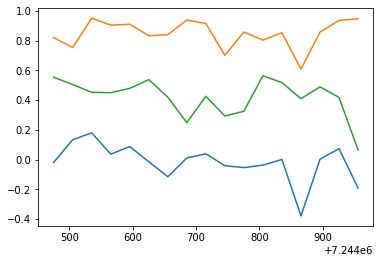

In [15]:
plt.plot(pipe.features["EDA_TonicEDA_Phasic_correl"])
plt.plot(pipe.features["EDA_RawEDA_Phasic_correl"])
plt.plot(pipe.features["EDA_RawEDA_Tonic_correl"])

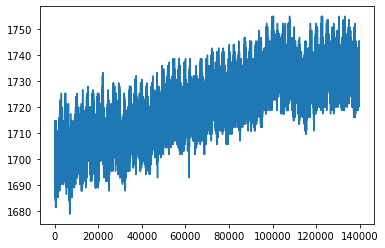

In [13]:
plt.plot(sample_data['GSR_CAL(kOhms)'])

In [14]:
decompose = biobss.pipeline.Bio_Process(
    process_method=biobss.edatools.eda_decompose, modality="EDA", sigtype="EDA", method="highpass")

filtering=biobss.pipeline.Bio_Process(
    process_method=biobss.signaltools.filter_signal, modality="EDA", sigtype="EDA",N=2, filter_type="highpass",f1=0.5,fs=700)

normalize = biobss.pipeline.Bio_Process(
    process_method=biobss.signaltools.normalize_signal, modality="EDA", sigtype="EDA")
resample = biobss.pipeline.Bio_Process(
    process_method=biobss.signaltools.resample_signal_object, modality="EDA", sigtype="EDA", target_sample_rate=350)
signal_features = biobss.pipeline.Feature(name="signal_features", function=biobss.edatools.signal_features.get_signal_features, parameters={
                                           "modality": "EDA", "sigtype": "EDA"}, input_signals={'EDA_Raw':'EDA_Raw', 'EDA_Tonic':'EDA_Tonic', 'EDA_Phasic':'EDA_Phasic'})
stat_features = biobss.pipeline.Feature(name="stat_features", function=biobss.common.stat_features.get_stat_features, parameters={
                                         "modality": "EDA", "sigtype": "EDA"}, input_signals={'EDA_Raw':'EDA_Raw', 'EDA_Tonic':'EDA_Tonic', 'EDA_Phasic':'EDA_Phasic'})
corr_features = biobss.pipeline.Feature(name="corr_features", function=biobss.common.correlation_features, parameters={
                                        "modality": "EDA", "sigtype": "EDA","signal_names":['EDA_Raw','EDA_Tonic','EDA_Phasic']}, input_signals={'EDA':['EDA_Raw','EDA_Tonic','EDA_Phasic']})

pipe = biobss.pipeline.Bio_Pipeline(modality="EDA", sigtype="EDA", windowed_process=False,
                                    window_size=60, step_size=30, features_list=[])

pipe.process_queue.add_process(resample)
pipe.process_queue.add_process(decompose)
pipe.add_feature_step(signal_features)
pipe.add_feature_step(stat_features)
pipe.add_feature_step(corr_features)
pipe.set_input(gsr_data, 256, name="EDA_Raw", modality="EDA",timestamp=timestamp_data)
pipe.run_pipeline()
pipe.extract_features()

Input is set with timestamp resolution of ms
Input is set with timestamp resolution of ms
Input is set with timestamp resolution of ms
Input is set with timestamp resolution of ms
Input is set with timestamp resolution of ms


In [15]:
pipe.input

Signal object with 3 channel(s)
EDA_Raw (EDA) (350Hz) ((546.0625,)s) (1 windows) ((191122,))
EDA_Tonic (EDA) (350Hz) ((546.0628571428572,)s) (1 windows) ((191122,))
EDA_Phasic (EDA) (350Hz) ((546.0628571428572,)s) (1 windows) ((191122,))

In [16]:
pipe.features

,EDA_Raw_rms,EDA_Raw_acr_length,EDA_Raw_integral,EDA_Raw_average_power,EDA_Tonic_rms,EDA_Tonic_acr_length,EDA_Tonic_integral,EDA_Tonic_average_power,EDA_Phasic_rms,EDA_Phasic_acr_length,...,EDA_Phasic_std,EDA_Phasic_max,EDA_Phasic_min,EDA_Phasic_range,EDA_Phasic_kurtosis,EDA_Phasic_skew,EDA_Phasic_momentum,EDA_RawEDA_Tonic_correl,EDA_RawEDA_Phasic_correl,EDA_TonicEDA_Phasic_correl
0,0.581096,191121.227316,111057.797116,0.337673,0.581101,191121.0,111058.977211,0.337678,0.001443,191121.227316,...,0.001443,0.008506,-0.011104,0.01961,1.538802,-0.055396,0.000002,0.933669,0.349287,0.000297
